In [1]:
import pandas as pd
from collections import Counter
import ast
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
df=pd.read_csv("Final_cleaned_file.csv")

In [3]:
df.head(10)

,Title,Working_Hours,Working_Place,Company,Location,Post_Date,Number_of_Applicants,Number_of_Positions,Career_Level,Education,Salary,Job_Category,Skills,Gender,Job_Category_Count,min_experience,max_experience,City,Country
0,(Customs Clearance - Expeditor) officer - 6 Mo...,Full Time,on-site,Sukari Gold Mines,"Alexandria, Egypt",28,56,4,Experienced (Non-Manager),Not Specified,19000 To 19000 EGP Per Month,Accounting/Finance,"['customer', 'brokerage', 'customer support', ...",both,901,1.0,3.0,Alexandria,Egypt
1,1) Accountant - 2) internal Auditor -3) Cost A...,Full Time,on-site,Green Foods,"Sheraton, Cairo",28,342,1,Experienced (Non-Manager),Not Specified,Confidential,Accounting/Finance,"['accounting', 'auditing', 'finance', 'account...",both,901,2.0,4.0,Sheraton,Cairo
2,A Credit Control/Accounts Receivable,Full Time,on-site,Alupco Aluminum Products,"Nasr City, Cairo",28,63,1,Experienced (Non-Manager),Not Specified,20000 To 25000 SAR Per Month,Accounting/Finance,"['accounting', 'accounts', 'accounts receivabl...",both,901,2.0,3.0,Nasr City,Cairo
3,A/P Accountant,Full Time,on-site,Groupe- Atlantic,"10th of Ramadan City, Cairo",28,93,1,Experienced (Non-Manager),Not Specified,Confidential,Accounting/Finance,"['accounting', 'commerce', 'ap', 'finance', 'ms']",both,901,2.0,4.0,10th of Ramadan City,Cairo
4,A/P Accountant,Full Time,on-site,New Mena Plast,"Obour City, Cairo",18,92,1,Experienced (Non-Manager),Not Specified,0 To 0 EGP Per Month,Accounting/Finance,"['accountant', 'accounting', 'ap', 'a/p', 'fin...",both,901,2.0,5.0,Obour City,Cairo
5,A/R accountant,Full Time,on-site,sofipack,"Badr City, Cairo",56,89,2,Experienced (Non-Manager),Bachelor'S Degree,"Confidential, Confidential",Accounting/Finance,"['ar', 'accounting']",both,901,6.0,9.0,Badr City,Cairo
6,AP Accountant,Full Time,on-site,WUZZUF,"Maadi, Cairo",24,184,1,Entry Level (Junior Level / Fresh Grad),Bachelor'S Degree,Confidential,Accounting/Finance,"['accounting', 'finance', 'financial analysis'...",both,901,1.0,3.0,Maadi,Cairo
7,AP Accountant,Full Time,on-site,Not Specified,"6th of October, Giza",56,97,1,Experienced (Non-Manager),Not Specified,Confidential,Accounting/Finance,"['accounting', 'accounting principles', 'finan...",both,901,2.0,3.0,6th of October,Giza
8,AP Accountant,Full Time,on-site,LEEDS FIT-OUT,"Sheikh Zayed, Giza",56,109,1,Experienced (Non-Manager),Not Specified,Confidential,Accounting/Finance,"['accounting', 'ap', 'finance', 'financial ana...",both,901,3.0,5.0,Sheikh Zayed,Giza
9,AP Accountant ( English Speaker),Full Time,on-site,London International Patient Services,"Sheraton, Cairo",56,56,1,Experienced (Non-Manager),Bachelor'S Degree,Confidential,Accounting/Finance,"['accounts payable', 'microsoft excel', 'commu...",both,901,1.0,2.0,Sheraton,Cairo


In [11]:
df.shape

(8257, 19)

What are the positions most people apply for?

In [96]:
df["Title"] = df["Title"].replace({"General Accountant": "Junior Accountant","Accountant": "Junior Accountant"})

C:\Users\AT Once\AppData\Local\Temp\ipykernel_24088\2594122185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_applied_jobs.values, y=top_applied_jobs.index, palette="magma")


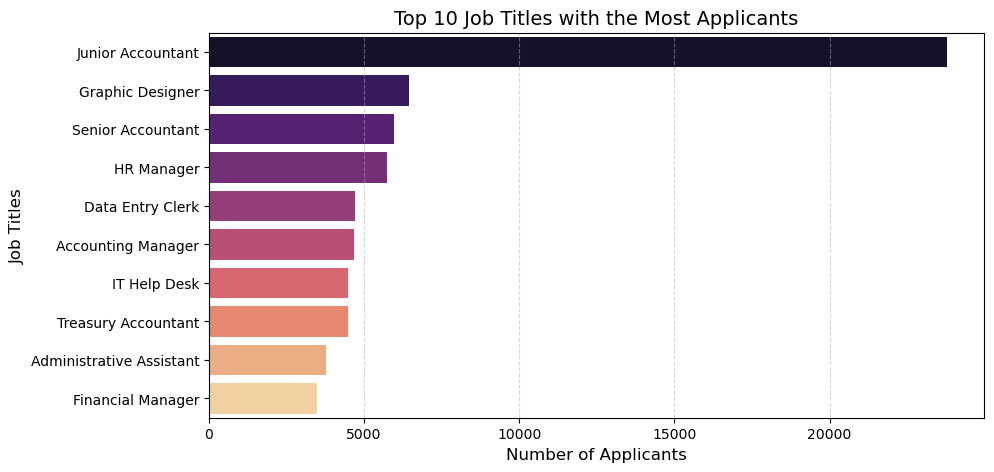

In [97]:
df["Number_of_Applicants"] = pd.to_numeric(df["Number_of_Applicants"], errors="coerce")
top_applied_jobs = df.groupby("Title")["Number_of_Applicants"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_applied_jobs.values, y=top_applied_jobs.index, palette="magma")
plt.xlabel("Number of Applicants", fontsize=12)
plt.ylabel("Job Titles", fontsize=12)
plt.title("Top 10 Job Titles with the Most Applicants", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

The distribution of experience according to job category

C:\Users\AT Once\AppData\Local\Temp\ipykernel_24088\1809977265.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_exp_categories, y="Job_Category", x="min_experience",ci=None)


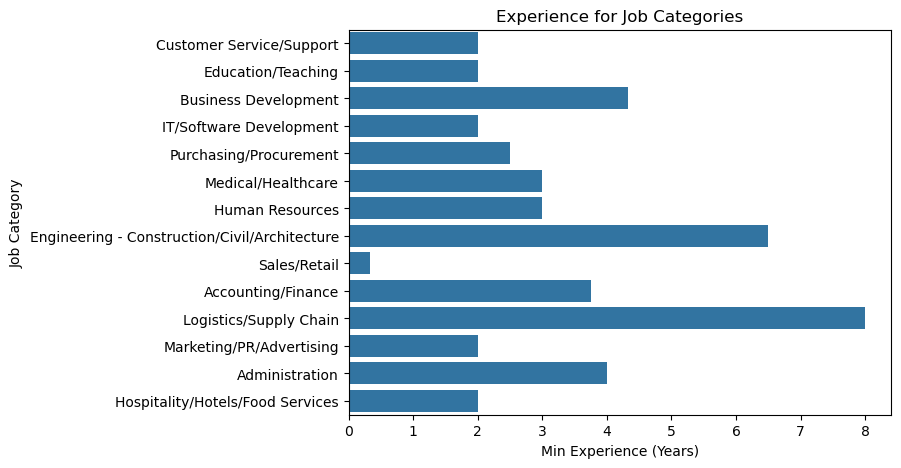

In [45]:
top_exp_categories = df.sample(30, random_state=42)
plt.figure(figsize=(7, 5))  
sns.barplot(data=top_exp_categories, y="Job_Category", x="min_experience",ci=None)
plt.xlabel("Min Experience (Years)", fontsize=10)
plt.ylabel("Job Category", fontsize=10)
plt.title("Experience for Job Categories")
plt.show()

Recurring job titles

C:\Users\AT Once\AppData\Local\Temp\ipykernel_24088\238669654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_titles.values, y=combined_titles.index, palette="magma")


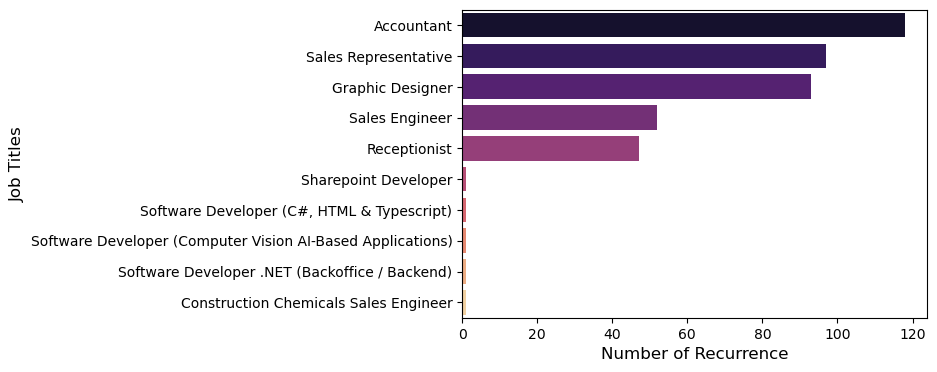

In [64]:
title_counts = df["Title"].value_counts()
top_10_titles = title_counts.head(5)
bottom_10_titles = title_counts.tail(5)
combined_titles = pd.concat([top_10_titles, bottom_10_titles])
plt.figure(figsize=(6, 4))
sns.barplot(x=combined_titles.values, y=combined_titles.index, palette="magma")
plt.xlabel("Number of Recurrence", fontsize=12)
plt.ylabel("Job Titles", fontsize=12)
plt.grid(False)
plt.show()


Recurring Companies

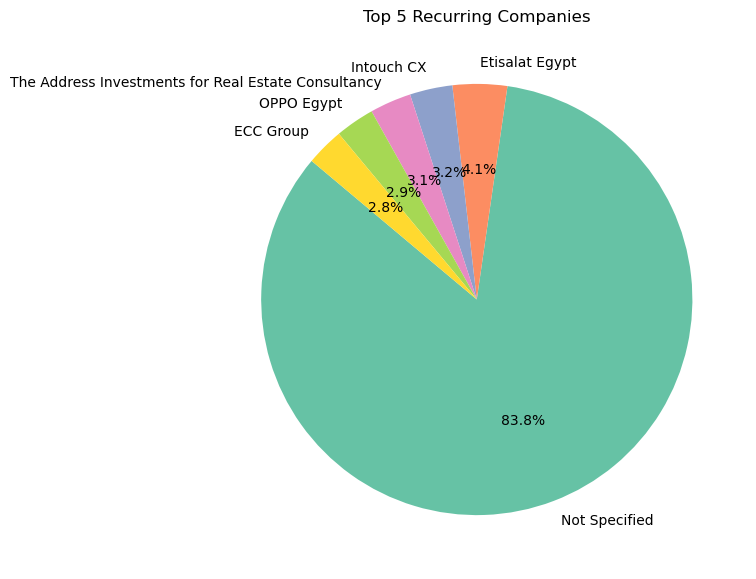

In [63]:
top_10_companies = df["Company"].value_counts().head(6)
plt.figure(figsize=(7, 7))  
plt.pie(top_10_companies.values, 
    labels=top_10_companies.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("Set2"),
    startangle=140
)
plt.title("Top 5 Recurring Companies")
plt.show()


Job category vs Experience

C:\Users\AT Once\AppData\Local\Temp\ipykernel_24088\3104743508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["Job_Category"].isin(selected_categories["Job_Category"])],


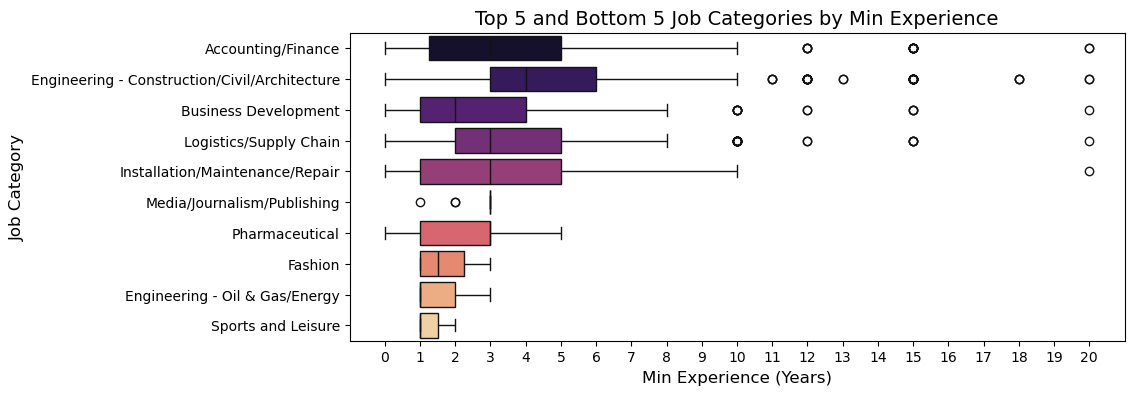

In [71]:
exp_by_category = df.groupby("Job_Category")["min_experience"].max()
top_10_exp_categories = exp_by_category.nlargest(5)
bottom_10_exp_categories = exp_by_category.nsmallest(5)
selected_categories = pd.concat([top_10_exp_categories, bottom_10_exp_categories]).reset_index()
selected_categories.columns = ["Job_Category", "min_experience"]
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[df["Job_Category"].isin(selected_categories["Job_Category"])], 
            x="min_experience", y="Job_Category", palette="magma")
plt.xlabel("Min Experience (Years)", fontsize=12)
plt.ylabel("Job Category", fontsize=12)
plt.title("Top 5 and Bottom 5 Job Categories by Min Experience", fontsize=14)
plt.xticks(range(0, 21), fontsize=10)
plt.show()

In [78]:
df["Education"] = df["Education"].replace({"College Diploma": "Diploma"})

Does higher career levels require higher education? (education vs career levels)

<Figure size 600x400 with 0 Axes>

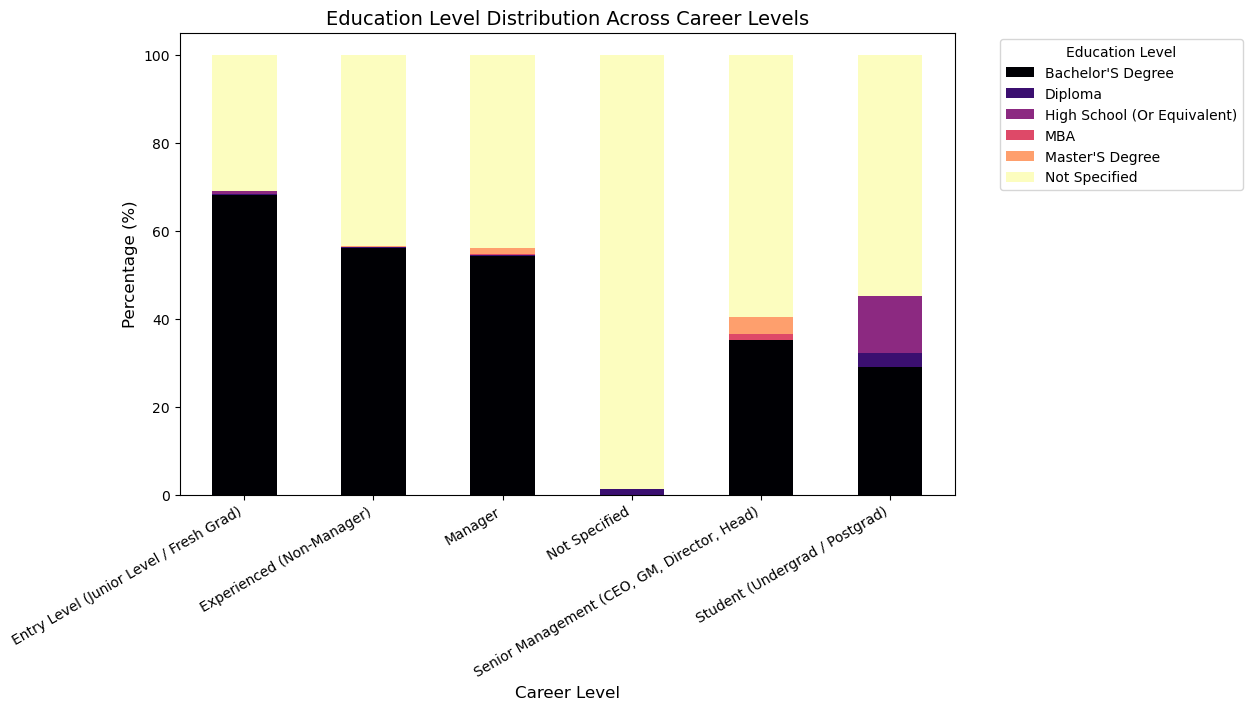

In [79]:
plt.figure(figsize=(6, 4))
education_career = pd.crosstab(df["Career_Level"], df["Education"], normalize="index") * 100
education_career.plot(kind="bar", stacked=True, colormap="magma", figsize=(10, 6))
plt.xlabel("Career Level", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Education Level Distribution Across Career Levels", fontsize=14)
plt.xticks(rotation=30, ha="right") 
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [72]:
df["Career_Level"].value_counts()

Career_Level
Experienced (Non-Manager)                      5054
Entry Level (Junior Level / Fresh Grad)        1934
Manager                                        1012
Senior Management (CEO, GM, Director, Head)     151
Not Specified                                    75
Student (Undergrad / Postgrad)                   31
Name: count, dtype: int64

Are people with higher experience more likely to have higher education? (education vs experience)

C:\Users\AT Once\AppData\Local\Temp\ipykernel_24088\3643321088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="min_experience", y="Education", palette="magma")


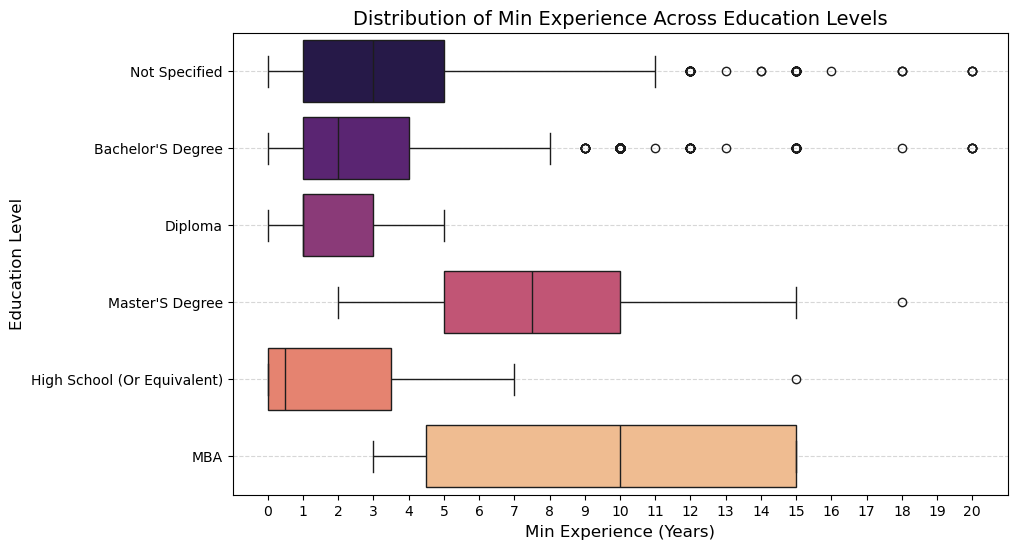

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="min_experience", y="Education", palette="magma")
plt.ylabel("Education Level", fontsize=12)
plt.xlabel("Min Experience (Years)", fontsize=12)
plt.title("Distribution of Min Experience Across Education Levels", fontsize=14)
plt.xticks(range(0, 21), fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Career level vs experience

C:\Users\AT Once\AppData\Local\Temp\ipykernel_24088\4246813004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_exp_avg.index, y=career_exp_avg.values, palette="magma")


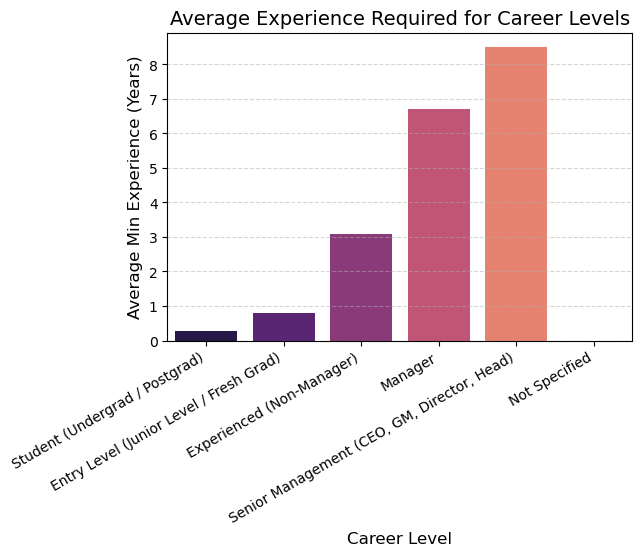

In [ ]:
plt.figure(figsize=(6, 4))
career_exp_avg = df.groupby("Career_Level")["min_experience"].mean().sort_values()
sns.barplot(x=career_exp_avg.index, y=career_exp_avg.values, palette="magma")
plt.xlabel("Career Level", fontsize=12)
plt.ylabel("Average Min Experience (Years)", fontsize=12)
plt.title("Average Experience Required for Career Levels", fontsize=14)
plt.xticks(rotation=30, ha="right") 
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

What are job categories that support remote work? (job categories vs Working_Place)

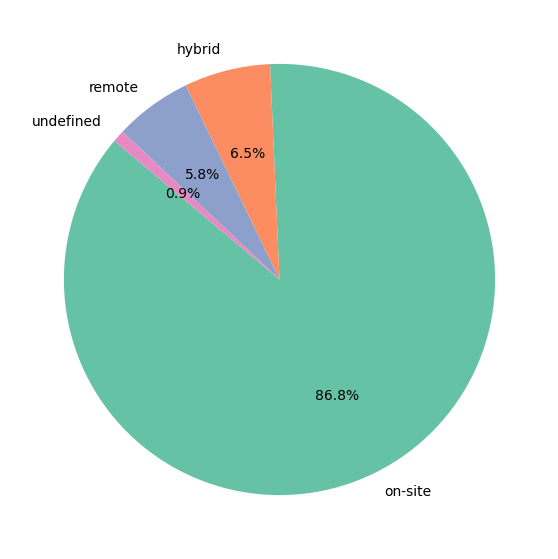

In [101]:
top_10_companies = df["Working_Place"].value_counts()
plt.figure(figsize=(7, 7))  
plt.pie(top_10_companies.values, 
    labels=top_10_companies.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("Set2"),
    startangle=140
)
plt.show()


<Figure size 800x400 with 0 Axes>

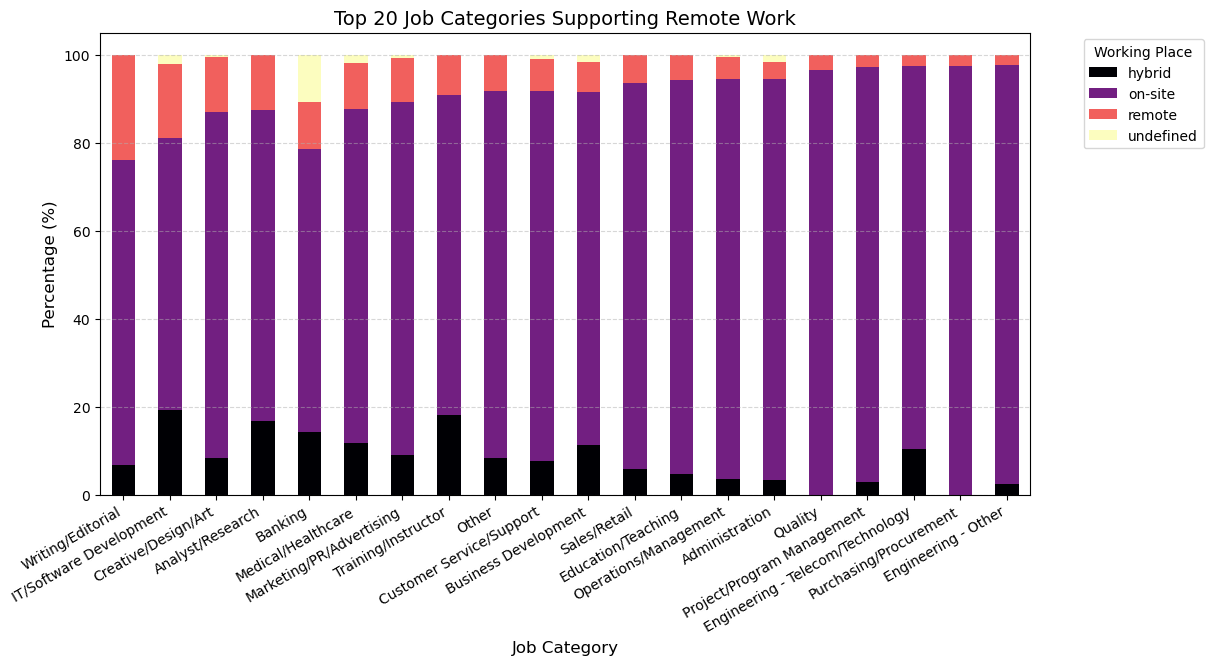

In [ ]:
plt.figure(figsize=(8, 4))
job_remote_dist = pd.crosstab(df["Job_Category"], df["Working_Place"], normalize="index") * 100
top_20_remote_jobs = job_remote_dist.sort_values(by="remote", ascending=False).head(20)
top_20_remote_jobs.plot(kind="bar", stacked=True, colormap="magma", figsize=(12, 6))
plt.xlabel("Job Category", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=30, ha="right") 
plt.legend(title="Working Place", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()